# Chronic Kidney Disease (CKD) Prediction - Data Exploration & Preprocessing

This notebook walks through the initial data exploration and preprocessing steps for building a CKD prediction model.

**What I'm doing here:**
- Loading and exploring the dataset
- Checking data quality and missing values
- Using KNN imputation to handle missing data
- Setting up data for cross-validation

Let's get started!

## Importing Libraries

In [82]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# for better readability and display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# set intial viz style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Loading the Dataset

I'm using the CKD dataset from the UCI Machine Learning Repository. The original file had some formatting issues, so I'm pulling a pre-cleaned version from the matthew-brett/datasets GitHub repo instead.

In [83]:
# Load the processed CKD dataset from GitHub (raw CSV)
# Source: https://github.com/matthew-brett/datasets/blob/1ac6d8cce354c35ff26664a84f57b1145bfb74d7/ckd/processed/ckd_full.csv
raw_url = 'https://raw.githubusercontent.com/matthew-brett/datasets/1ac6d8cce354c35ff26664a84f57b1145bfb74d7/ckd/processed/ckd_full.csv'

# Read directly from the raw GitHub URL into a DataFrame
df = pd.read_csv(raw_url, encoding='utf-8')


# (Optional) If you prefer a local copy, uncomment and set a path, then run df.to_csv(local_path, index=False)
# local_path = '/path/to/data/ckd_full_processed.csv'
# df.to_csv(local_path, index=False)

## Taking a First Look at the Data

In [84]:
# Display the first 10 rows
print(" First 10 patients in our dataset:\n")
df.head(10)

 First 10 patients in our dataset:



,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


Right away I can see a few things that need attention:
- Several columns are stored as objects when they should be numeric
- There are 24 features plus the target variable
- Definitely need to do some data cleaning before analysis

In [85]:
# Get comprehensive dataset information
print("DATASET INFORMATION")
print("=" * 60)
print(f"Number of patients (rows):    {df.shape[0]}")
print(f"Number of features (columns): {df.shape[1]}")
print(f"\n")

# Display column names and their data types
print(" COLUMN INFORMATION:")
print("-" * 60)
df.info()




DATASET INFORMATION
Number of patients (rows):    400
Number of features (columns): 25


 COLUMN INFORMATION:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine 

### Fixing Data Types

Some features like Sugar, Albumin, and Specific Gravity are actually categorical/ordinal variables (they represent discrete levels), not continuous numbers. Let me convert those.

In [ ]:
# Fix data types: These are categorical (ordinal), not continuous numeric
df['Sugar'] = df['Sugar'].astype('object')  # 0-5 scale
df['Albumin'] = df['Albumin'].astype('object')  # 0-5 scale
df['Specific Gravity'] = df['Specific Gravity'].astype('object')  # discrete values

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    object 
 3   Albumin                  354 non-null    object 
 4   Sugar                    351 non-null    object 
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [87]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

Specific Gravity has [1.02 1.01 1.005 1.015 nan 1.025] values

Albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0] values

Sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0] values

Red Blood Cells has [nan 'normal' 'abnormal'] values

Pus Cell has ['normal' 'abnormal' nan] values

Pus Cell clumps has ['notpresent' 'present' nan] values

Bacteria has ['notpresent' 'present' nan] values

Hypertension has ['yes' 'no' nan] values

Diabetes Mellitus has ['yes' 'no' nan] values

Coronary Artery Disease has ['no' 'yes' nan] values

Appetite has ['good' 'poor' nan] values

Pedal Edema has ['no' 'yes' nan] values

Anemia has ['no' 'yes' nan] values

Class has ['ckd' 'notckd'] values



### Encoding the Target Variable

Converting the Class variable from text ('ckd', 'notckd') to numeric (0, 1) for modeling.

In [88]:
df['Class'] = df['Class'].map({'ckd': 0, 'notckd': 1})
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')

In [122]:
df.describe().T.round(2)  # .T transposes for better readability, round to 2 decimals

,count,mean,std,min,25%,50%,75%,max
Age,391.0,51.48,17.17,2.0,42.0,55.00,64.5,90.0
Blood Pressure,388.0,76.47,13.68,50.0,70.0,80.00,80.0,180.0
Blood Glucose Random,356.0,148.04,79.28,22.0,99.0,121.00,163.0,490.0
Blood Urea,381.0,57.43,50.50,1.5,27.0,42.00,66.0,391.0
Serum Creatinine,383.0,3.07,5.74,0.4,0.9,1.30,2.8,76.0
Sodium,313.0,137.53,10.41,4.5,135.0,138.00,142.0,163.0
Potassium,312.0,4.63,3.19,2.5,3.8,4.40,4.9,47.0
Hemoglobin,348.0,12.53,2.91,3.1,10.3,12.65,15.0,17.8
Packed Cell Volume,329.0,38.88,8.99,9.0,32.0,40.00,45.0,54.0
White Blood Cell Count,294.0,8406.12,2944.47,2200.0,6500.0,8000.00,9800.0,26400.0


In [ ]:
# Creating a summary table for the report
import os
results_dir = '/Users/reembaraka/Documents/Boulder data science/DTSA 5506/Project/results'
os.makedirs(results_dir, exist_ok=True)

# Calculate missing values before creating table
missing_stats_temp = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing %', ascending=False)

# Get class counts
class_counts = df['Class'].value_counts()

summary_data = {
    'Metric': [
        'Total Patients',
        'Total Features',
        'Target Variable',
        'CKD Cases (Class 0)',
        'Not CKD Cases (Class 1)',
        'Class Imbalance Ratio',
        'Numeric Features',
        'Categorical Features',
        'Missing Values (Total)',
        'Missing % (Overall)',
        'Most Missing Feature',
        'Data Collection Period'
    ],
    'Value': [
        df.shape[0],
        df.shape[1] - 1,  # Excluding target
        'Class (0=CKD, 1=Not CKD)',
        f"{(df['Class'] == 0).sum()} ({(df['Class'] == 0).sum() / len(df) * 100:.1f}%)",
        f"{(df['Class'] == 1).sum()} ({(df['Class'] == 1).sum() / len(df) * 100:.1f}%)",
        f"{class_counts.max() / class_counts.min():.2f}:1",
        len(df.select_dtypes(include=[np.number]).columns) - 1,  # Exclude Class
        len([col for col in df.columns if df[col].dtype == 'object']),
        int(df.isnull().sum().sum()),
        f"{(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%",
        f"{missing_stats_temp.iloc[0]['Column']} ({missing_stats_temp.iloc[0]['Missing %']:.1f}%)",
        'July - November 2015'
    ]
}

summary_table = pd.DataFrame(summary_data)
summary_table.to_csv(f'{results_dir}/dataset_summary_table.csv', index=False)
print("Summary table saved!")
summary_table

✅ Summary table saved to: dataset_summary_table.csv



,Metric,Value
0,Total Patients,400
1,Total Features,24
2,Target Variable,"Class (0=CKD, 1=Not CKD)"
3,CKD Cases (Class 0),250 (62.5%)
4,Not CKD Cases (Class 1),150 (37.5%)
5,Class Imbalance Ratio,1.67:1
6,Numeric Features,11
7,Categorical Features,13
8,Missing Values (Total),1012
9,Missing % (Overall),10.12%


## Exploratory Data Analysis

Now let's visualize the data to understand patterns, distributions, and relationships between features.

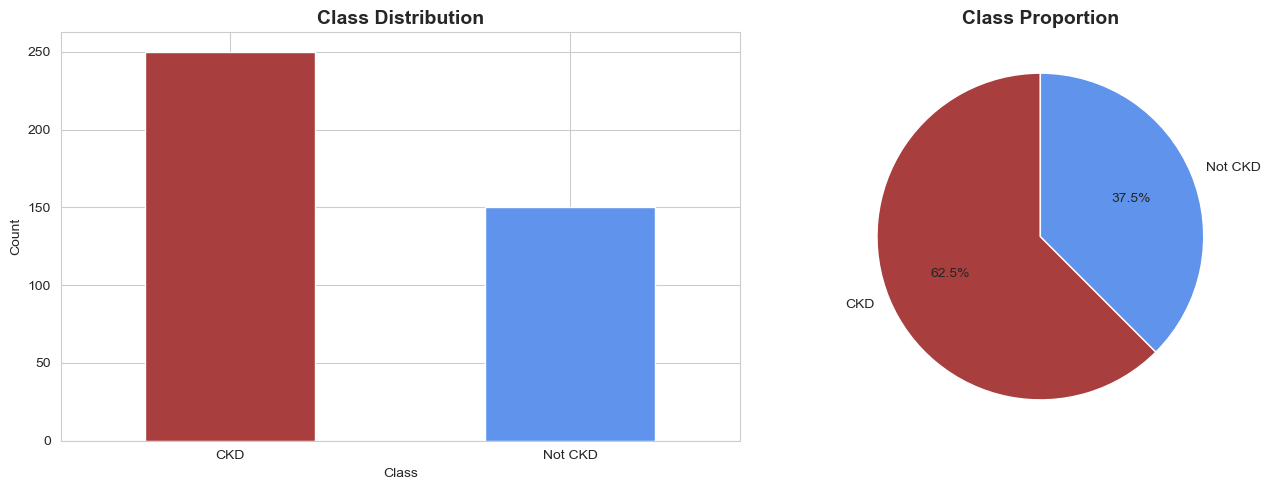


Class Distribution:
Class
0    250
1    150
Name: count, dtype: int64

Class Imbalance Ratio: 1.67:1


In [ ]:
# Checking class balance
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['Class'].value_counts().plot(kind='bar', ax=ax[0], color=["#a93e3eff", "#6093ec"])
ax[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['CKD', 'Not CKD'], rotation=0)

# Pie chart
class_counts = df['Class'].value_counts()
ax[1].pie(class_counts, labels=['CKD', 'Not CKD'], autopct='%1.1f%%', 
          colors=["#a93e3eff", "#6093ec"], startangle=90)
ax[1].set_title('Class Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nClass Distribution:")
print(df['Class'].value_counts())
print(f"\nImbalance Ratio: {class_counts.max() / class_counts.min():.2f}:1")

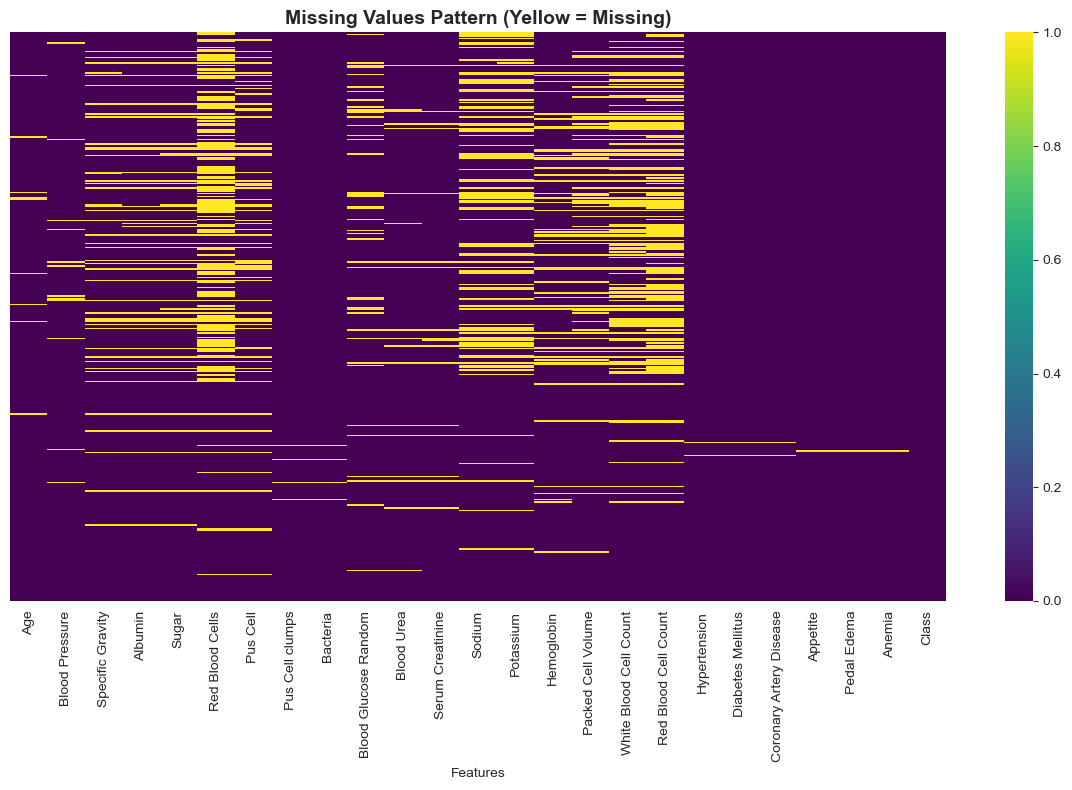


Missing Values Summary:
                         Missing Count  Missing %
Red Blood Cells                    152      38.00
Red Blood Cell Count               131      32.75
White Blood Cell Count             106      26.50
Potassium                           88      22.00
Sodium                              87      21.75
Packed Cell Volume                  71      17.75
Pus Cell                            65      16.25
Hemoglobin                          52      13.00
Sugar                               49      12.25
Specific Gravity                    47      11.75
Albumin                             46      11.50
Blood Glucose Random                44      11.00
Blood Urea                          19       4.75
Serum Creatinine                    17       4.25
Blood Pressure                      12       3.00
Age                                  9       2.25
Bacteria                             4       1.00
Pus Cell clumps                      4       1.00
Hypertension             

In [ ]:
# Visualizing missing data patterns
plt.figure(figsize=(12, 8))
missing = df.isnull()
sns.heatmap(missing, cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Pattern (Yellow = Missing)', fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

# Get detailed stats on missing values
missing_stats = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing %', ascending=False)

print("\nMissing Values Summary:")
print(missing_stats[missing_stats['Missing Count'] > 0])

In [118]:
missing_stats['Missing Count'].sum()

1012

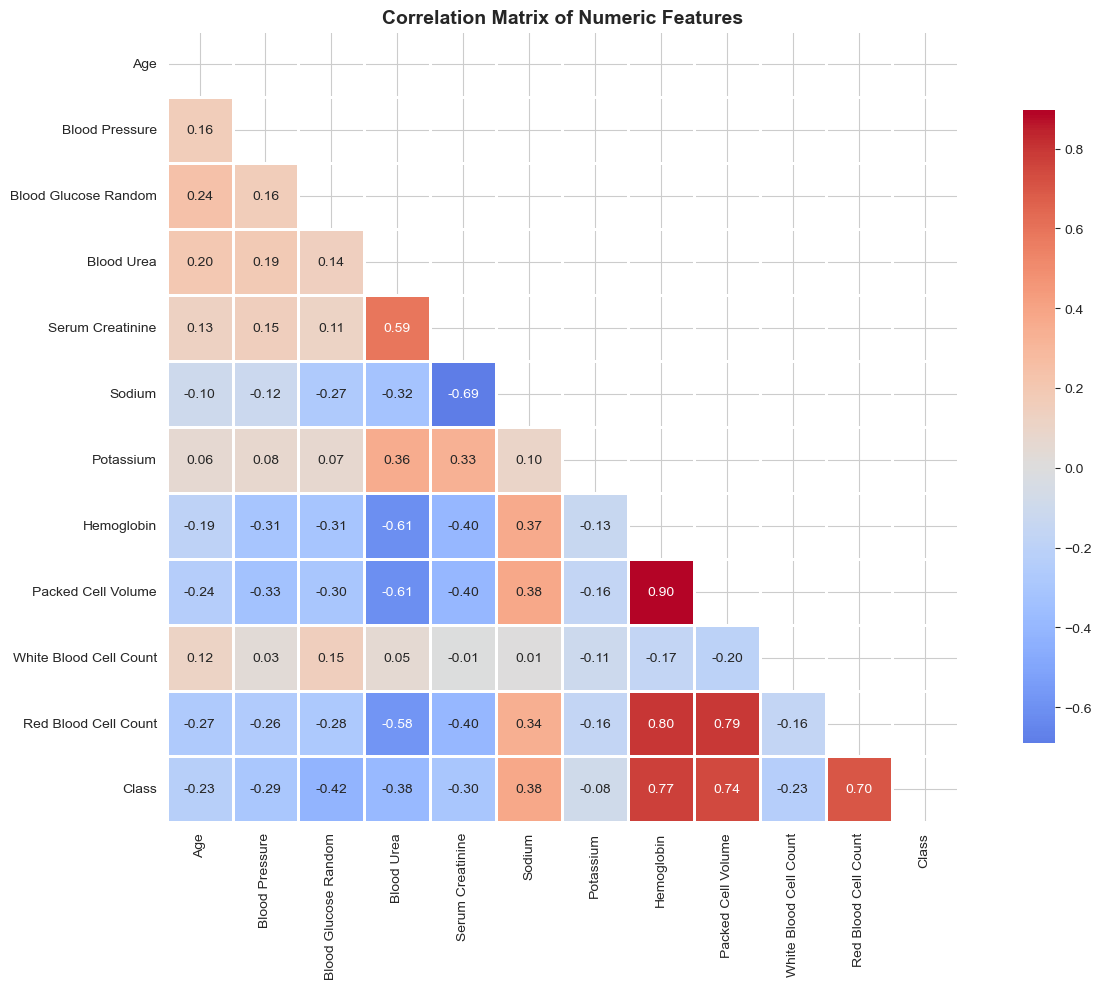


TOP FEATURES CORRELATED WITH CLASS

📊 Ranked by Correlation Strength (Absolute Value):
--------------------------------------------------------------------------------
Rank   Feature                        Actual     Absolute   Direction
--------------------------------------------------------------------------------
1      Hemoglobin                       0.7689    0.7689  Positive ↑
2      Packed Cell Volume               0.7414    0.7414  Positive ↑
3      Red Blood Cell Count             0.6991    0.6991  Positive ↑
4      Blood Glucose Random            -0.4197    0.4197  Negative ↓
5      Blood Urea                      -0.3806    0.3806  Negative ↓
6      Sodium                           0.3757    0.3757  Positive ↑
7      Serum Creatinine                -0.3000    0.3000  Negative ↓
8      Blood Pressure                  -0.2941    0.2941  Negative ↓
9      White Blood Cell Count          -0.2319    0.2319  Negative ↓
10     Age                             -0.2273    0.2273  N

In [ ]:
# Correlation analysis for numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(14, 10))
correlation = df[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numeric Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Which features correlate most with CKD?
if 'Class' in numeric_cols:
    print("\n" + "=" * 80)
    print("FEATURES MOST CORRELATED WITH CKD")
    print("=" * 80)
    
    class_corr_actual = correlation['Class'].drop('Class')
    class_corr_abs = class_corr_actual.abs().sort_values(ascending=False)
    
    print("\n📊 Top 10 Features by Correlation Strength:")
    print("-" * 80)
    print(f"{'Rank':<6} {'Feature':<30} {'Actual':<10} {'Absolute':<10} {'Direction'}")
    print("-" * 80)
    
    for idx, feature in enumerate(class_corr_abs.head(10).index, 1):
        actual_corr = class_corr_actual[feature]
        abs_corr = abs(actual_corr)
        direction = "Positive ↑" if actual_corr > 0 else "Negative ↓"
        print(f"{idx:<6} {feature:<30} {actual_corr:>8.4f}  {abs_corr:>8.4f}  {direction}")
    
    print("\n💡 Note:")
    print("  • Actual: Original correlation value (-1 to +1)")
    print("  • Absolute: Correlation strength (0 to 1)")
    print("  • Positive ↑: Higher values → More likely CKD")
    print("  • Negative ↓: Higher values → Less likely CKD")

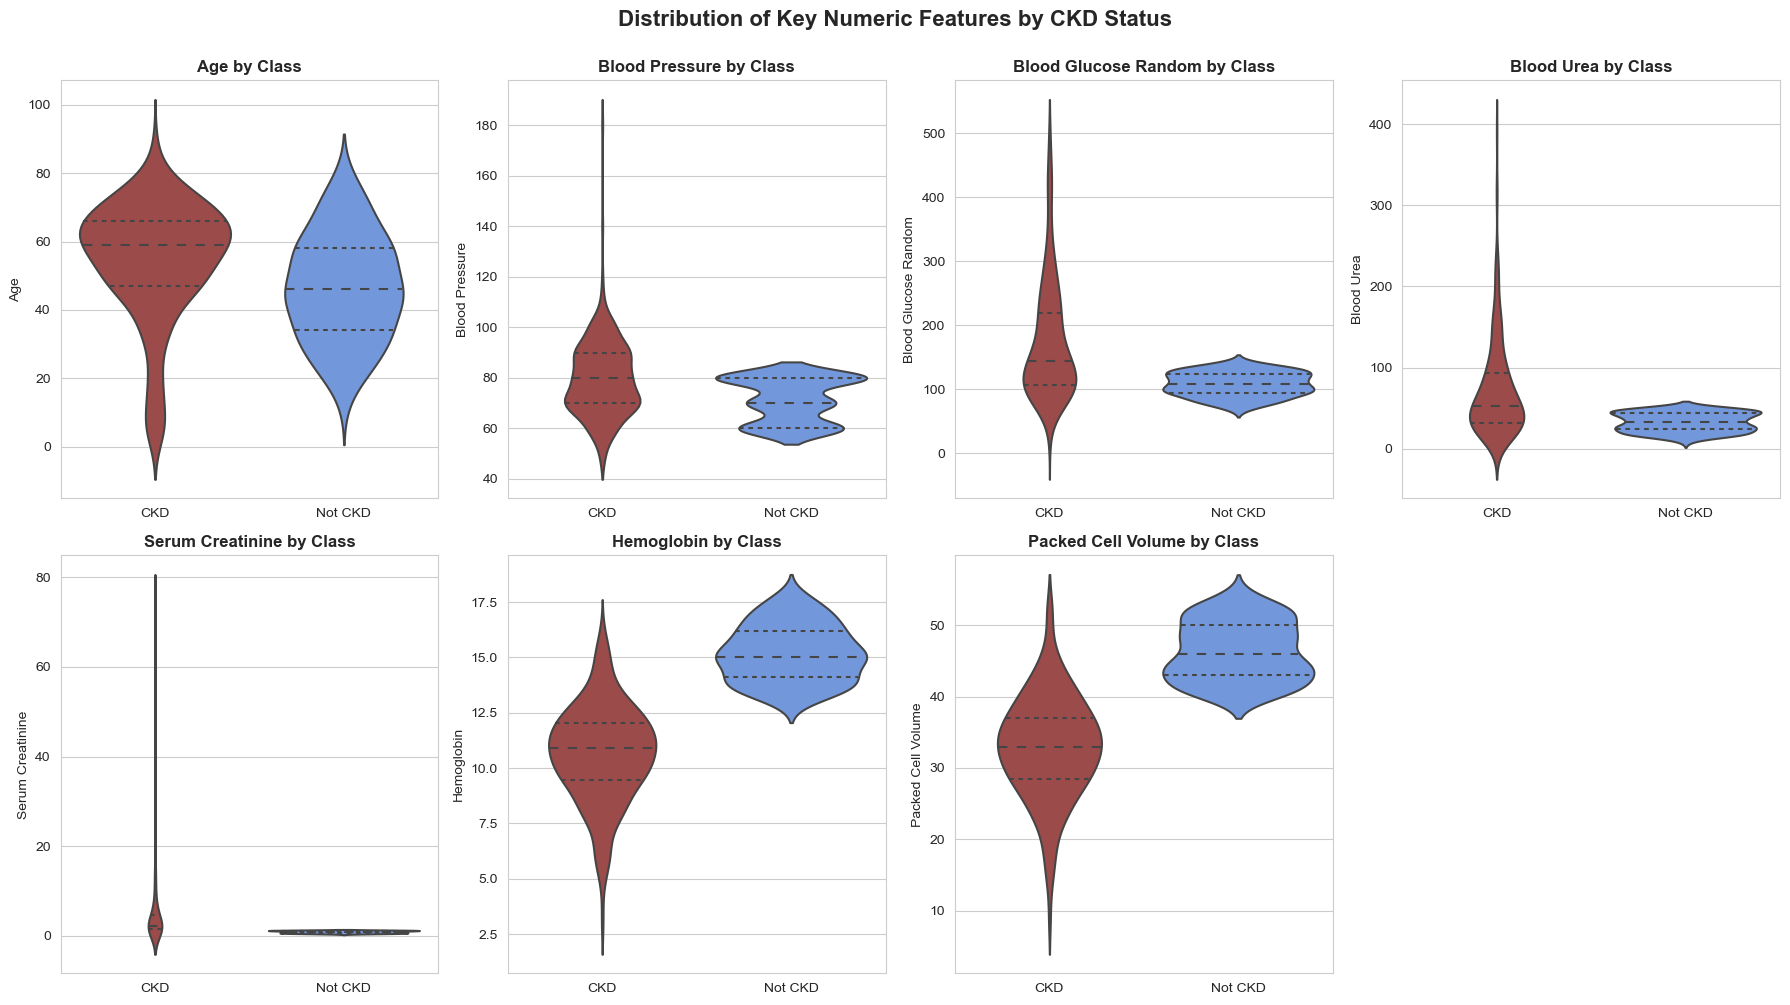

In [ ]:
# Looking at how key features differ between CKD and non-CKD patients
key_features = ['Age', 'Blood Pressure', 'Blood Glucose Random', 'Blood Urea', 
                'Serum Creatinine', 'Hemoglobin', 'Packed Cell Volume']

existing_features = [f for f in key_features if f in df.columns]

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(existing_features[:8]):
    sns.violinplot(data=df, x='Class', y=feature, ax=axes[idx], 
                   palette={0: "#a93e3eff", 1: '#6093ec'}, inner='quartile')
    axes[idx].set_title(f'{feature} by Class', fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_xticklabels(['CKD', 'Not CKD'])

# Hide extra subplots
for idx in range(len(existing_features), 8):
    axes[idx].axis('off')

plt.suptitle('Distribution of Key Numeric Features by CKD Status', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

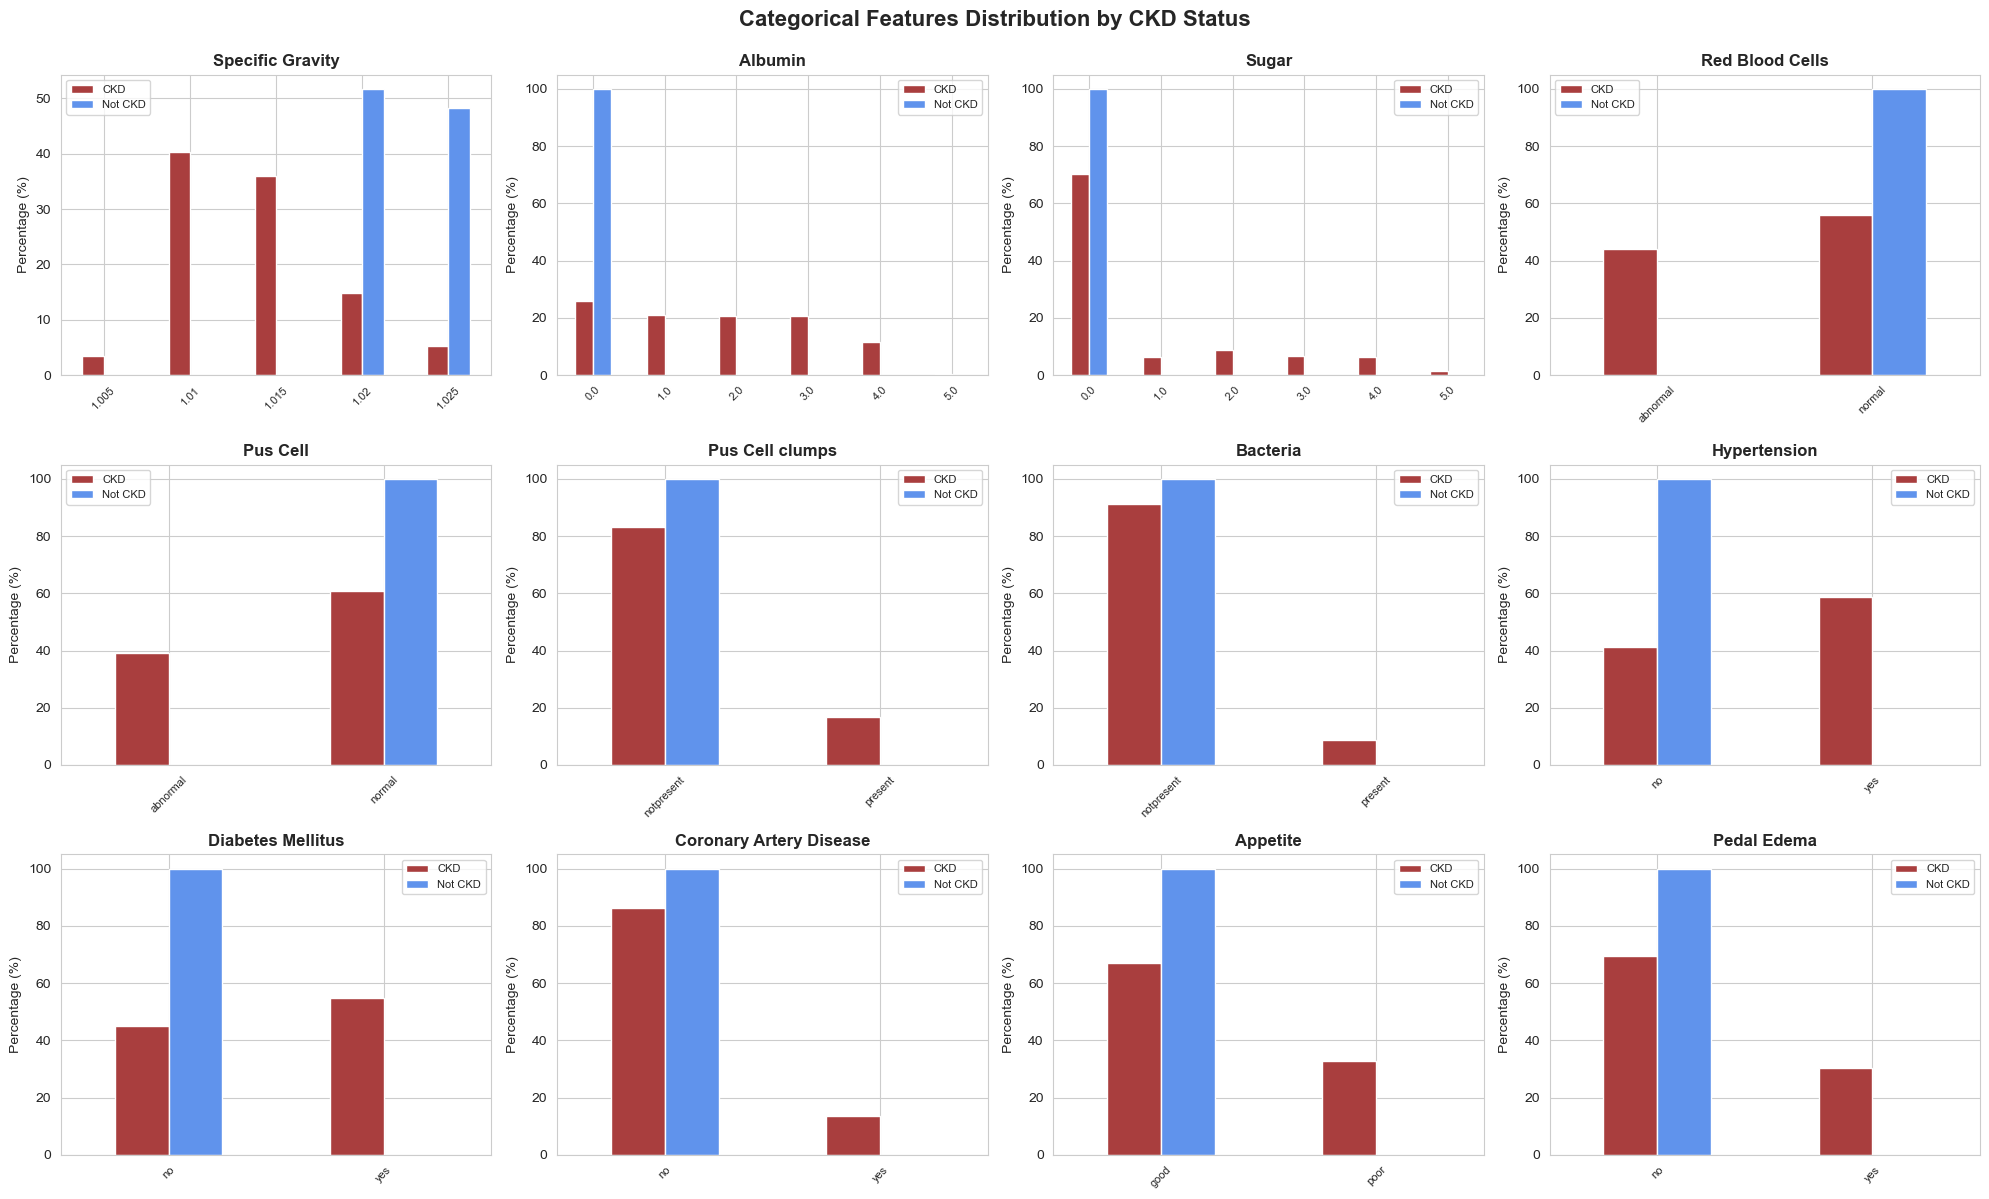


Total categorical features visualized: 12
Categorical columns: ['Specific Gravity', 'Albumin', 'Sugar', 'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema']


In [ ]:
# Categorical features - how do they vary by CKD status?
cat_features = [col for col in df.columns if df[col].dtype == 'object']

existing_cat = cat_features[:12]

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.flatten()

for idx, feature in enumerate(existing_cat):
    ct = pd.crosstab(df[feature], df['Class'], normalize='columns') * 100
    ct.plot(kind='bar', ax=axes[idx], color=["#a93e3eff", "#6093ec"])
    axes[idx].set_title(f'{feature}', fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(['CKD', 'Not CKD'], fontsize=8)
    axes[idx].tick_params(axis='x', rotation=45, labelsize=8)

# Hide extra subplots
for idx in range(len(existing_cat), 12):
    axes[idx].axis('off')

plt.suptitle('Categorical Features Distribution by CKD Status', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"\nVisualized {len(existing_cat)} categorical features")

In [ ]:
# Why are some bars missing? Let's check the raw counts
print("RAW COUNTS FOR CATEGORICAL FEATURES")
print("=" * 80)

for feature in existing_cat[:5]:
    print(f"\n{feature}:")
    print("-" * 80)
    ct_counts = pd.crosstab(df[feature], df['Class'], margins=True)
    ct_counts.columns = ['CKD (0)', 'Not CKD (1)', 'Total']
    print(ct_counts)
    print(f"\nNote: Missing bars mean that category has 0 patients in one class")

RAW COUNTS BY CLASS FOR CATEGORICAL FEATURES

Specific Gravity:
--------------------------------------------------------------------------------
                  CKD (0)  Not CKD (1)  Total
Specific Gravity                             
1.005                   7            0      7
1.01                   84            0     84
1.015                  75            0     75
1.02                   31           75    106
1.025                  11           70     81
All                   208          145    353

⚠️ Note: If a category has 0 in 'Not CKD (1)' column, that's why the bar is missing!

Albumin:
--------------------------------------------------------------------------------
         CKD (0)  Not CKD (1)  Total
Albumin                             
0.0           54          145    199
1.0           44            0     44
2.0           43            0     43
3.0           43            0     43
4.0           24            0     24
5.0            1            0      1
All          2

## Checking for Outliers

Using the IQR method to identify outliers - values that fall below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.

I'm keeping the outliers since they likely represent severe cases that are clinically relevant.

In [ ]:
# Detecting outliers using IQR method
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Class' in numeric_features:
    numeric_features.remove('Class')

outlier_summary = []

for col in numeric_features:
    if df[col].isna().all():
        continue
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers_mask.sum()
    total_non_null = df[col].count()
    outlier_pct = (outlier_count / total_non_null * 100) if total_non_null > 0 else 0
    
    outlier_summary.append({
        'Feature': col,
        'Outliers': outlier_count,
        'Outlier %': round(outlier_pct, 2),
        'Lower Bound': round(lower_bound, 2),
        'Upper Bound': round(upper_bound, 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Outliers', ascending=False)

# Save results
import os
results_dir = '/Users/reembaraka/Documents/Boulder data science/DTSA 5506/Project/results'
os.makedirs(results_dir, exist_ok=True)
outlier_df.to_csv(f'{results_dir}/outlier_summary.csv')

outlier_df

,Feature,Outliers,Outlier %,Lower Bound,Upper Bound
4,Serum Creatinine,51,13.32,-1.95,5.65
3,Blood Urea,38,9.97,-31.50,124.50
1,Blood Pressure,36,9.28,55.00,95.00
2,Blood Glucose Random,34,9.55,3.00,259.00
5,Sodium,16,5.11,124.50,152.50
0,Age,10,2.56,8.25,98.25
9,White Blood Cell Count,10,3.40,1550.00,14750.00
6,Potassium,4,1.28,2.15,6.55
7,Hemoglobin,1,0.29,3.25,22.05
8,Packed Cell Volume,1,0.30,12.50,64.50


## Handling Missing Values

Time to deal with the missing data. Let me take a closer look at what's missing.

In [ ]:
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)
missing_data = missing_data.reset_index(drop=True)
missing_data['Missing_Percentage'] = missing_data['Missing_Percentage'].astype(str) + '%'
missing_data.head(10)

# Save for reference
import os
results_dir = '/Users/reembaraka/Documents/Boulder data science/DTSA 5506/Project/results'
os.makedirs(results_dir, exist_ok=True) 
missing_data.to_csv(f'{results_dir}/missing_data_summary.csv')

### Imputation Strategy

I'm using KNN imputation (k=5) to fill in missing values. This works for both numeric and categorical features.

Here's the plan:
1. Encode categorical variables so KNN can work with them
2. Run KNN imputation on everything
3. Keep the encoded categorical variables for modeling

**Visualizing missing data:**

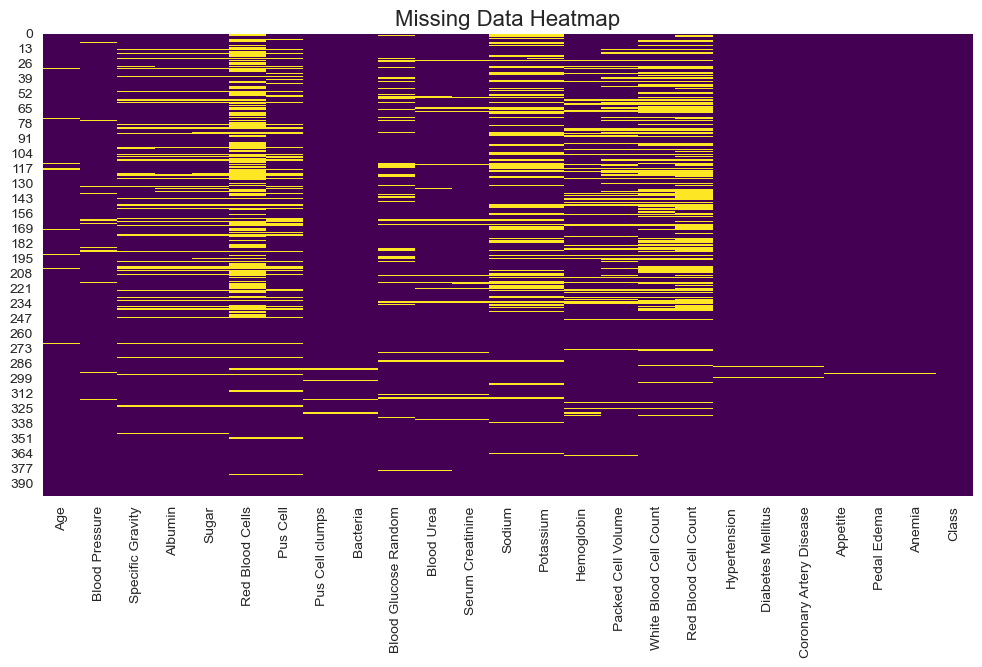

In [97]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', ax=ax)
ax.set_title('Missing Data Heatmap', fontsize=16)
plt.show()

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Working on a copy so we don't mess up the original
df_imputed = df.copy()

# Separate numeric and categorical columns
num_cols_imputed = df_imputed.select_dtypes(include=['float64']).columns.tolist()
cat_cols_imputed = [col for col in df_imputed.select_dtypes(include=['object']).columns.tolist() if col != 'Class']

# Encode categorical columns for KNN
label_encoders = {}
cat_mapping = {}
for col in cat_cols_imputed:
    le = LabelEncoder()
    non_null_values = df_imputed[col].dropna()
    le.fit(non_null_values)

    df_imputed[col] = df_imputed[col].map(lambda x: le.transform([x])[0] if pd.notna(x) else np.nan)
    
    label_encoders[col] = le
    cat_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Encoded {col} with mapping: {cat_mapping[col]}")


# Apply KNN Imputation
imputer = KNNImputer(n_neighbors=5)
all_cols = num_cols_imputed + cat_cols_imputed
df_imputed[all_cols] = imputer.fit_transform(df_imputed[all_cols])

# Round categorical columns back to integers
for col in cat_cols_imputed:
    le = label_encoders[col]
    df_imputed[col] = df_imputed[col].round().astype(int)
    df_imputed[col] = df_imputed[col].clip(0, len(le.classes_) - 1)
    print(f"  ✅ Rounded {col} (kept encoded)")

print("\nData after KNN Imputation:")
df_imputed.info()

Encoded Specific Gravity with mapping: {1.005: 0, 1.01: 1, 1.015: 2, 1.02: 3, 1.025: 4}
Encoded Albumin with mapping: {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5}
Encoded Sugar with mapping: {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5}
Encoded Red Blood Cells with mapping: {'abnormal': 0, 'normal': 1}
Encoded Pus Cell with mapping: {'abnormal': 0, 'normal': 1}
Encoded Pus Cell clumps with mapping: {'notpresent': 0, 'present': 1}
Encoded Bacteria with mapping: {'notpresent': 0, 'present': 1}
Encoded Hypertension with mapping: {'no': 0, 'yes': 1}
Encoded Diabetes Mellitus with mapping: {'no': 0, 'yes': 1}
Encoded Coronary Artery Disease with mapping: {'no': 0, 'yes': 1}
Encoded Appetite with mapping: {'good': 0, 'poor': 1}
Encoded Pedal Edema with mapping: {'no': 0, 'yes': 1}
Encoded Anemia with mapping: {'no': 0, 'yes': 1}
  ✅ Rounded Specific Gravity (kept encoded)
  ✅ Rounded Albumin (kept encoded)
  ✅ Rounded Sugar (kept encoded)
  ✅ Rounded Red Blood Cells (kept encoded)
  ✅

## Setting Up Cross-Validation

I'm using 5-fold stratified cross-validation to make the most of the data while keeping class proportions balanced in each fold.

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Separate features and target
X = df_imputed.drop('Class', axis=1)
y = df_imputed['Class'] 

# Set up 5-fold stratified CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Check fold sizes and class distributions
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    print(f"\nFold {fold + 1}:")
    print(f"  Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")
    print(f"  Train class distribution:\n{y_train.value_counts(normalize=True).map(lambda x: f'{x:.2%}')}")
    print(f"  Test class distribution:\n{y_test.value_counts(normalize=True).map(lambda x: f'{x:.2%}')}")


Fold 1:
  Train size: 320, Test size: 80
  Train class distribution:
Class
0    62.50%
1    37.50%
Name: proportion, dtype: object
  Test class distribution:
Class
0    62.50%
1    37.50%
Name: proportion, dtype: object

Fold 2:
  Train size: 320, Test size: 80
  Train class distribution:
Class
0    62.50%
1    37.50%
Name: proportion, dtype: object
  Test class distribution:
Class
0    62.50%
1    37.50%
Name: proportion, dtype: object

Fold 3:
  Train size: 320, Test size: 80
  Train class distribution:
Class
0    62.50%
1    37.50%
Name: proportion, dtype: object
  Test class distribution:
Class
0    62.50%
1    37.50%
Name: proportion, dtype: object

Fold 4:
  Train size: 320, Test size: 80
  Train class distribution:
Class
0    62.50%
1    37.50%
Name: proportion, dtype: object
  Test class distribution:
Class
0    62.50%
1    37.50%
Name: proportion, dtype: object

Fold 5:
  Train size: 320, Test size: 80
  Train class distribution:
Class
0    62.50%
1    37.50%
Name: proportion

## Feature Scaling Plan

I'll use StandardScaler for normalization (z-score: mean=0, std=1).

Why StandardScaler?
- More robust to outliers compared to MinMaxScaler
- Works better with algorithms like Logistic Regression and SVM
- Standard practice for medical/clinical data

The actual scaling will happen later inside the modeling pipeline to prevent data leakage across CV folds.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler (will fit on training data during modeling to avoid leakage)
scaler = StandardScaler()

# Example of how this will be used in the modeling notebook:
print('\n💻 Example usage in modeling:')
print("from sklearn.pipeline import Pipeline")
print("from sklearn.linear_model import LogisticRegression")
print("pipe = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())])")
print("# then: cross_val_score(pipe, X, y, cv=skf, scoring='roc_auc')")


💻 Example (in modeling notebook):
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())])
# then use cross_val_score(pipe, X, y, cv=skf, scoring='roc_auc')


## Saving Preprocessed Data

Saving the cleaned data for the modeling phase:
- `X.csv` - Feature matrix (400 × 24)
- `y.csv` - Target labels (400)
- `categorical_mappings.json` - Encoding reference
- `preprocessing_summary.txt` - Documentation

In [ ]:
import json
import os

# Set output directory
output_dir = '/Users/reembaraka/Documents/Boulder data science/DTSA 5506/Project/Data/Pre-Processed'
os.makedirs(output_dir, exist_ok=True)

# Save features and target
X.to_csv(os.path.join(output_dir, 'X.csv'), index=False)
y.to_csv(os.path.join(output_dir, 'y.csv'), index=False, header=['Class'])

# Save categorical encoding mappings
cat_mapping_serializable = {}
for col, mapping in cat_mapping.items():
    cat_mapping_serializable[col] = {k: int(v) for k, v in mapping.items()}

with open(os.path.join(output_dir, 'categorical_mappings.json'), 'w') as f:
    json.dump(cat_mapping_serializable, f, indent=2)

## Post-Imputation Data Quality Check

Let's verify the data quality and check if the correlations make sense after imputation.

I'm expecting:
- Serum Creatinine to show stronger correlation with CKD (it's a key kidney function marker)
- Top correlated features should be: Hemoglobin, Packed Cell Volume, Specific Gravity, RBC, Albumin

In [ ]:
# Checking data quality after imputation
print("=" * 80)
print("POST-IMPUTATION DATA QUALITY CHECK")
print("=" * 80)

missing_after = df_imputed.isnull().sum().sum()
print(f"\n✅ Total missing values after imputation: {missing_after}")
print(f"   (Should be 0)\n")

# Verify data types
print("-" * 80)
print("DATA TYPES:")
print("-" * 80)
print(f"Numeric features: {len(df_imputed.select_dtypes(include=[np.number]).columns)}")
print(f"Object features: {len(df_imputed.select_dtypes(include=['object']).columns)}")
print(f"   (All should be numeric after encoding)\n")

# Recompute correlations after imputation
print("=" * 80)
print("CORRELATION ANALYSIS (POST-IMPUTATION)")
print("=" * 80)

numeric_cols_imputed = df_imputed.select_dtypes(include=[np.number]).columns.tolist()
correlation_imputed = df_imputed[numeric_cols_imputed].corr()

if 'Class' in numeric_cols_imputed:
    class_corr_imputed = correlation_imputed['Class'].drop('Class').abs().sort_values(ascending=False)
    
    print("\n📊 Top 10 Features Correlated with Class (Post-Imputation):")
    print("-" * 80)
    for idx, (feature, corr_value) in enumerate(class_corr_imputed.head(10).items(), 1):
        print(f"  {idx:2d}. {feature:30s} {corr_value:.4f}")
    
    # Check if expected features are in top 10
    print("\n" + "=" * 80)
    print("CLINICAL EXPECTATIONS CHECK")
    print("=" * 80)
    
    expected_top = ['Hemoglobin', 'Packed Cell Volume', 'Specific Gravity', 
                    'Red Blood Cells', 'Albumin', 'Serum Creatinine', 'Blood Urea']
    
    print("\n✓ Checking for clinically important features in top 10:")
    print("-" * 80)
    
    top_10_features = class_corr_imputed.head(10).index.tolist()
    
    for feature in expected_top:
        if feature in top_10_features:
            rank = top_10_features.index(feature) + 1
            corr_val = class_corr_imputed[feature]
            print(f"  ✅ {feature:30s} Rank: {rank:2d}  |  Correlation: {corr_val:.4f}")
        elif feature in class_corr_imputed.index:
            rank = list(class_corr_imputed.index).index(feature) + 1
            corr_val = class_corr_imputed[feature]
            print(f"  ⚠️  {feature:30s} Rank: {rank:2d}  |  Correlation: {corr_val:.4f}  (Not in top 10)")
        else:
            print(f"  ❌ {feature:30s} NOT FOUND in dataset")
    
    # Serum Creatinine specific check
    print("\n" + "=" * 80)
    print("SERUM CREATININE VALIDATION")
    print("=" * 80)
    
    if 'Serum Creatinine' in class_corr_imputed.index:
        sc_rank = list(class_corr_imputed.index).index('Serum Creatinine') + 1
        sc_corr = class_corr_imputed['Serum Creatinine']
        
        print(f"\n  Feature: Serum Creatinine")
        print(f"  Rank: {sc_rank} out of {len(class_corr_imputed)}")
        print(f"  Correlation: {sc_corr:.4f}")
        
        if sc_corr > 0.50:
            print(f"  Status: ✅ Strong correlation (expected for kidney function marker)")
        elif sc_corr > 0.30:
            print(f"  Status: ⚠️ Moderate correlation (acceptable but lower than expected)")
        else:
            print(f"  Status: ❌ Weak correlation (unexpected for primary kidney marker)")
        
        # Compare before vs after if possible
        if 'Serum Creatinine' in correlation.index:
            sc_corr_before = correlation['Class']['Serum Creatinine']
            print(f"\n  Pre-imputation correlation:  {sc_corr_before:.4f}")
            print(f"  Post-imputation correlation: {sc_corr:.4f}")
            print(f"  Change: {sc_corr - sc_corr_before:+.4f}")
            
            if sc_corr > sc_corr_before:
                print(f"  ✅ Correlation improved after imputation")
            else:
                print(f"  ⚠️ Correlation decreased after imputation")

print("\n" + "=" * 80)
print("✅ POST-IMPUTATION SANITY CHECK COMPLETE")
print("=" * 80)

POST-IMPUTATION DATA QUALITY CHECK

✅ Total missing values after imputation: 0
   (Expected: 0)

--------------------------------------------------------------------------------
DATA TYPES:
--------------------------------------------------------------------------------
Numeric features: 25
Object features: 0
   (Expected: All numeric after encoding)

CORRELATION ANALYSIS (POST-IMPUTATION)

📊 Top 10 Features Correlated with Class (Post-Imputation):
--------------------------------------------------------------------------------
   1. Hemoglobin                     0.7129
   2. Specific Gravity               0.7067
   3. Packed Cell Volume             0.6738
   4. Albumin                        0.6066
   5. Hypertension                   0.5904
   6. Red Blood Cell Count           0.5736
   7. Diabetes Mellitus              0.5591
   8. Red Blood Cells                0.4618
   9. Blood Glucose Random           0.4132
  10. Appetite                       0.3933

CLINICAL EXPECTATIONS CHE

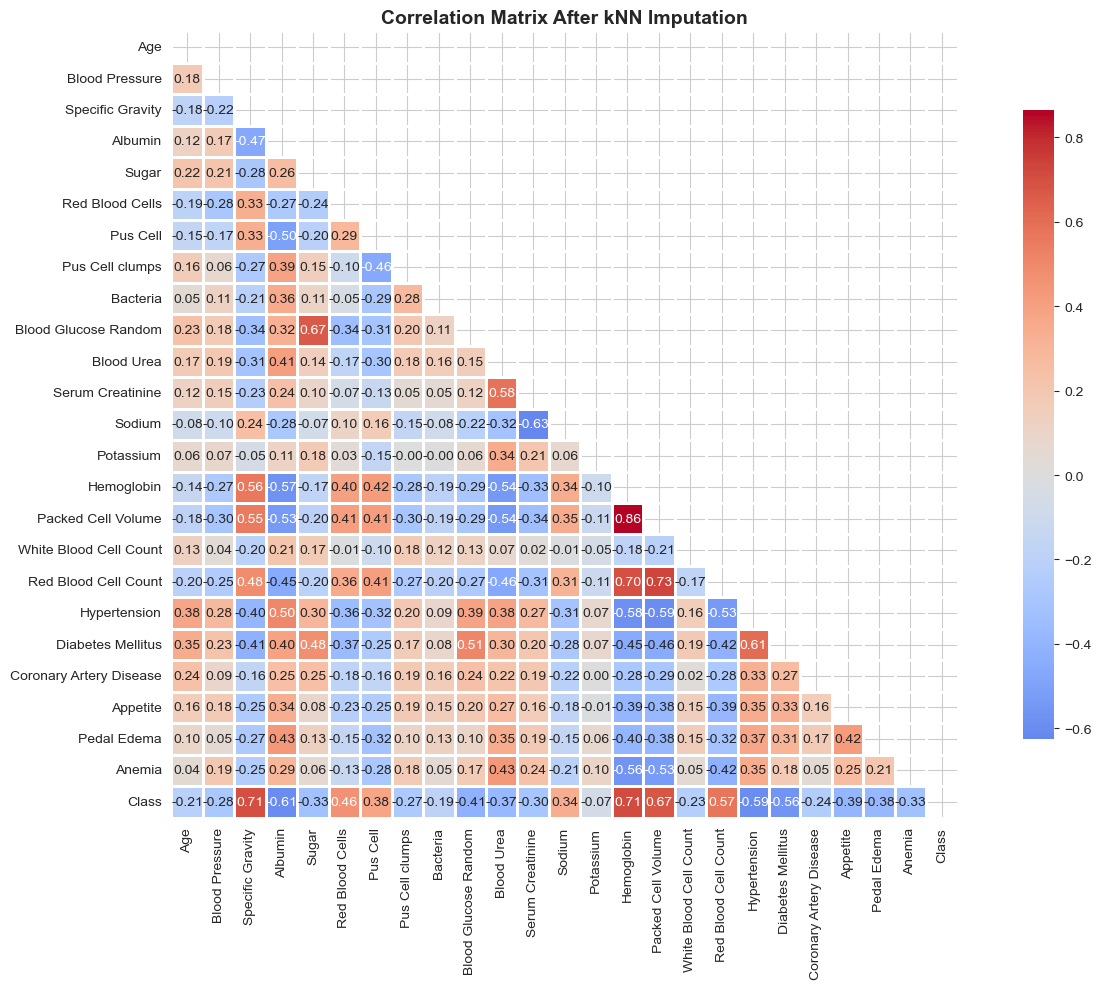

In [107]:
plt.figure(figsize=(14, 10))
mask_imputed = np.triu(np.ones_like(correlation_imputed, dtype=bool))
sns.heatmap(correlation_imputed, mask=mask_imputed, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix After kNN Imputation', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Deep Dive: Serum Creatinine Analysis

Serum Creatinine is the gold standard biomarker for kidney function. I'm expecting it to show strong correlation (>0.6) with CKD.

Let me investigate:
1. Distribution before vs after imputation
2. Missing data patterns
3. Outliers
4. Relationship with other kidney markers
5. Clinical threshold alignment

In [ ]:
# Analyzing missing data patterns for Serum Creatinine
print("=" * 80)
print("SERUM CREATININE: MISSING DATA ANALYSIS")
print("=" * 80)

sc_missing_count = df['Serum Creatinine'].isnull().sum()
sc_missing_pct = (sc_missing_count / len(df)) * 100

print(f"\nMissing Values:")
print(f"  Count: {sc_missing_count} / {len(df)}")
print(f"  Percentage: {sc_missing_pct:.2f}%")

# Check if missing pattern differs by class
print(f"\nMissing Pattern by Class:")
for class_val in [0, 1]:
    class_name = "CKD" if class_val == 0 else "Not CKD"
    class_mask = df['Class'] == class_val
    class_total = class_mask.sum()
    class_missing = df.loc[class_mask, 'Serum Creatinine'].isnull().sum()
    class_missing_pct = (class_missing / class_total) * 100
    print(f"  {class_name:10s}: {class_missing:3d} / {class_total:3d} ({class_missing_pct:5.2f}%)")

print(f"\n⚠️ If one class has much higher missing rate, imputation could affect correlation")
print("=" * 80)

SERUM CREATININE: MISSING DATA ANALYSIS

Missing Values:
  Count: 17 / 400
  Percentage: 4.25%

Missing Pattern by Class:
  CKD       :  12 / 250 ( 4.80%)
  Not CKD   :   5 / 150 ( 3.33%)

⚠️ High missing rate in one class could dilute correlation after imputation!


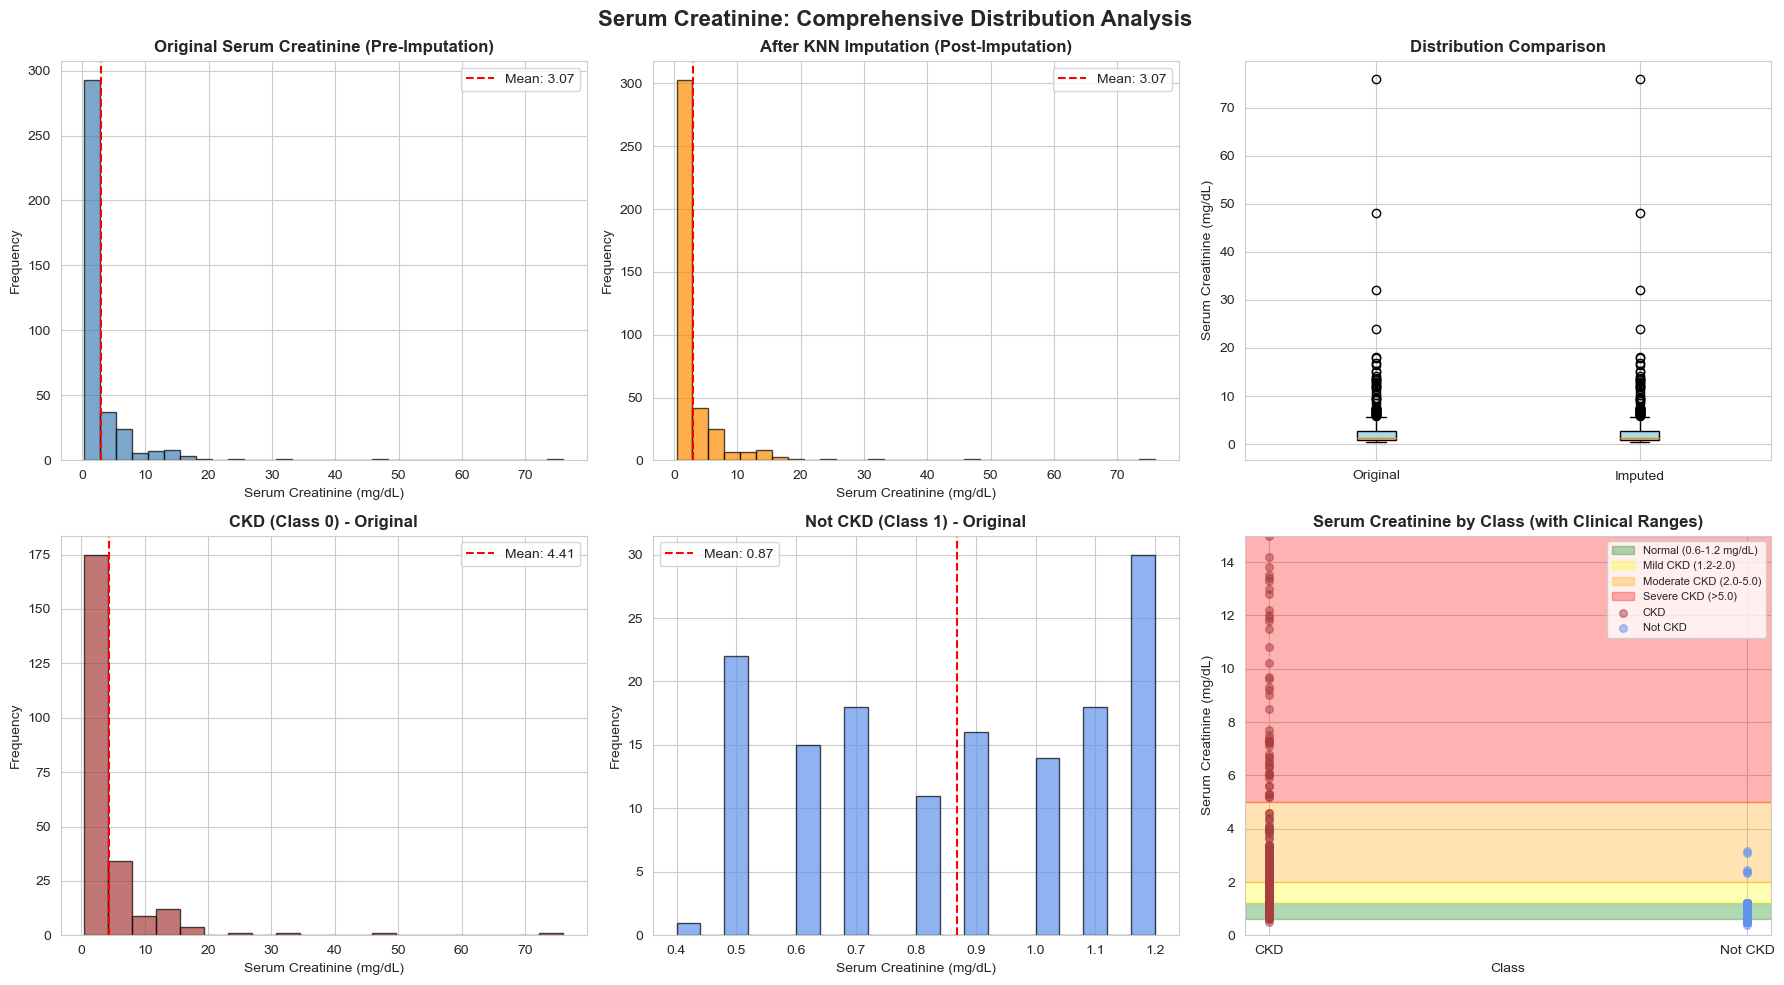


DISTRIBUTION STATISTICS

Metric                    Original        Imputed        
--------------------------------------------------------------------------------
Mean                                3.07           3.07
Median                              1.30           1.36
Std Dev                             5.74           5.63
Min                                 0.40           0.40
Max                                76.00          76.00
Q1 (25%)                            0.90           0.90
Q3 (75%)                            2.80           2.82


In [ ]:
# Distribution comparison: before and after imputation
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sc_original = df['Serum Creatinine'].dropna()
sc_imputed = df_imputed['Serum Creatinine']

# Row 1: Overall distributions
axes[0, 0].hist(sc_original, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Original Serum Creatinine (Pre-Imputation)', fontweight='bold')
axes[0, 0].set_xlabel('Serum Creatinine (mg/dL)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(sc_original.mean(), color='red', linestyle='--', label=f'Mean: {sc_original.mean():.2f}')
axes[0, 0].legend()

axes[0, 1].hist(sc_imputed, bins=30, alpha=0.7, color='darkorange', edgecolor='black')
axes[0, 1].set_title('After KNN Imputation (Post-Imputation)', fontweight='bold')
axes[0, 1].set_xlabel('Serum Creatinine (mg/dL)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(sc_imputed.mean(), color='red', linestyle='--', label=f'Mean: {sc_imputed.mean():.2f}')
axes[0, 1].legend()

# Boxplot comparison
axes[0, 2].boxplot([sc_original, sc_imputed], labels=['Original', 'Imputed'], patch_artist=True,
                    boxprops=dict(facecolor='lightblue'))
axes[0, 2].set_title('Distribution Comparison', fontweight='bold')
axes[0, 2].set_ylabel('Serum Creatinine (mg/dL)')

# Row 2: By class
for idx, class_val in enumerate([0, 1]):
    class_name = "CKD (Class 0)" if class_val == 0 else "Not CKD (Class 1)"
    
    sc_orig_class = df[df['Class'] == class_val]['Serum Creatinine'].dropna()
    axes[1, idx].hist(sc_orig_class, bins=20, alpha=0.7, color=['#a93e3eff', '#6093ec'][idx], edgecolor='black')
    axes[1, idx].set_title(f'{class_name} - Original', fontweight='bold')
    axes[1, idx].set_xlabel('Serum Creatinine (mg/dL)')
    axes[1, idx].set_ylabel('Frequency')
    axes[1, idx].axvline(sc_orig_class.mean(), color='red', linestyle='--', 
                          label=f'Mean: {sc_orig_class.mean():.2f}')
    axes[1, idx].legend()

# Clinical reference ranges with scatter plot
axes[1, 2].axhspan(0.6, 1.2, alpha=0.3, color='green', label='Normal (0.6-1.2 mg/dL)')
axes[1, 2].axhspan(1.2, 2.0, alpha=0.3, color='yellow', label='Mild CKD (1.2-2.0)')
axes[1, 2].axhspan(2.0, 5.0, alpha=0.3, color='orange', label='Moderate CKD (2.0-5.0)')
axes[1, 2].axhspan(5.0, 15, alpha=0.3, color='red', label='Severe CKD (>5.0)')

for class_val in [0, 1]:
    mask = df_imputed['Class'] == class_val
    axes[1, 2].scatter(df_imputed.loc[mask, 'Class'], df_imputed.loc[mask, 'Serum Creatinine'],
                       alpha=0.5, label=['CKD', 'Not CKD'][class_val], 
                       color=['#a93e3eff', '#6093ec'][class_val], s=30)

axes[1, 2].set_title('Serum Creatinine by Class (with Clinical Ranges)', fontweight='bold')
axes[1, 2].set_xlabel('Class')
axes[1, 2].set_ylabel('Serum Creatinine (mg/dL)')
axes[1, 2].set_xticks([0, 1])
axes[1, 2].set_xticklabels(['CKD', 'Not CKD'])
axes[1, 2].legend(fontsize=8, loc='upper right')
axes[1, 2].set_ylim(0, 15)

plt.suptitle('Serum Creatinine: Distribution Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print stats
print("\n" + "=" * 80)
print("DISTRIBUTION STATISTICS")
print("=" * 80)
print(f"\n{'Metric':<25} {'Original':<15} {'Imputed':<15}")
print("-" * 80)
print(f"{'Mean':<25} {sc_original.mean():>14.2f} {sc_imputed.mean():>14.2f}")
print(f"{'Median':<25} {sc_original.median():>14.2f} {sc_imputed.median():>14.2f}")
print(f"{'Std Dev':<25} {sc_original.std():>14.2f} {sc_imputed.std():>14.2f}")
print(f"{'Min':<25} {sc_original.min():>14.2f} {sc_imputed.min():>14.2f}")
print(f"{'Max':<25} {sc_original.max():>14.2f} {sc_imputed.max():>14.2f}")
print(f"{'Q1 (25%)':<25} {sc_original.quantile(0.25):>14.2f} {sc_imputed.quantile(0.25):>14.2f}")
print(f"{'Q3 (75%)':<25} {sc_original.quantile(0.75):>14.2f} {sc_imputed.quantile(0.75):>14.2f}")
print("=" * 80)

In [ ]:
# How well does Serum Creatinine separate CKD vs non-CKD?
print("=" * 80)
print("CLASS SEPARATION: SERUM CREATININE")
print("=" * 80)

# Stats by class (original data)
print("\n📊 ORIGINAL DATA (Non-Missing Only):")
print("-" * 80)
for class_val in [0, 1]:
    class_name = "CKD" if class_val == 0 else "Not CKD"
    sc_class = df[df['Class'] == class_val]['Serum Creatinine'].dropna()
    print(f"\n{class_name}:")
    print(f"  Count:    {len(sc_class)}")
    print(f"  Mean:     {sc_class.mean():.2f} mg/dL")
    print(f"  Median:   {sc_class.median():.2f} mg/dL")
    print(f"  Std Dev:  {sc_class.std():.2f} mg/dL")
    print(f"  Range:    [{sc_class.min():.2f}, {sc_class.max():.2f}] mg/dL")

ckd_mean_orig = df[df['Class'] == 0]['Serum Creatinine'].dropna().mean()
not_ckd_mean_orig = df[df['Class'] == 1]['Serum Creatinine'].dropna().mean()
print(f"\n  Mean Difference: {ckd_mean_orig - not_ckd_mean_orig:.2f} mg/dL")

# Stats by class (imputed data)
print("\n📊 AFTER IMPUTATION:")
print("-" * 80)
for class_val in [0, 1]:
    class_name = "CKD" if class_val == 0 else "Not CKD"
    sc_class_imp = df_imputed[df_imputed['Class'] == class_val]['Serum Creatinine']
    print(f"\n{class_name}:")
    print(f"  Count:    {len(sc_class_imp)}")
    print(f"  Mean:     {sc_class_imp.mean():.2f} mg/dL")
    print(f"  Median:   {sc_class_imp.median():.2f} mg/dL")
    print(f"  Std Dev:  {sc_class_imp.std():.2f} mg/dL")
    print(f"  Range:    [{sc_class_imp.min():.2f}, {sc_class_imp.max():.2f}] mg/dL")

ckd_mean_imp = df_imputed[df_imputed['Class'] == 0]['Serum Creatinine'].mean()
not_ckd_mean_imp = df_imputed[df_imputed['Class'] == 1]['Serum Creatinine'].mean()
print(f"\n  Mean Difference: {ckd_mean_imp - not_ckd_mean_imp:.2f} mg/dL")

# Effect size (Cohen's d)
pooled_std_orig = np.sqrt((df[df['Class'] == 0]['Serum Creatinine'].dropna().var() + 
                            df[df['Class'] == 1]['Serum Creatinine'].dropna().var()) / 2)
cohens_d_orig = (ckd_mean_orig - not_ckd_mean_orig) / pooled_std_orig

pooled_std_imp = np.sqrt((df_imputed[df_imputed['Class'] == 0]['Serum Creatinine'].var() + 
                           df_imputed[df_imputed['Class'] == 1]['Serum Creatinine'].var()) / 2)
cohens_d_imp = (ckd_mean_imp - not_ckd_mean_imp) / pooled_std_imp

print("\n" + "=" * 80)
print("EFFECT SIZE (Cohen's d):")
print("=" * 80)
print(f"  Original Data:    {cohens_d_orig:.3f}")
print(f"  After Imputation: {cohens_d_imp:.3f}")
print(f"\n  Interpretation: ", end="")
if abs(cohens_d_imp) > 0.8:
    print("✅ Large effect (strong separation)")
elif abs(cohens_d_imp) > 0.5:
    print("⚠️ Medium effect (moderate separation)")
elif abs(cohens_d_imp) > 0.2:
    print("⚠️ Small effect (weak separation)")
else:
    print("❌ Negligible effect (poor separation)")
    
print("\n💡 Low Cohen's d means classes overlap significantly on this feature")
print("=" * 80)

CLASS SEPARATION: SERUM CREATININE

📊 ORIGINAL DATA (Non-Missing Only):
--------------------------------------------------------------------------------

CKD:
  Count:    238
  Mean:     4.41 mg/dL
  Median:   2.25 mg/dL
  Std Dev:  6.95 mg/dL
  Range:    [0.50, 76.00] mg/dL

Not CKD:
  Count:    145
  Mean:     0.87 mg/dL
  Median:   0.90 mg/dL
  Std Dev:  0.26 mg/dL
  Range:    [0.40, 1.20] mg/dL

  Mean Difference: 3.55 mg/dL

📊 AFTER IMPUTATION:
--------------------------------------------------------------------------------

CKD:
  Count:    250
  Mean:     4.36 mg/dL
  Median:   2.30 mg/dL
  Std Dev:  6.80 mg/dL
  Range:    [0.50, 76.00] mg/dL

Not CKD:
  Count:    150
  Mean:     0.93 mg/dL
  Median:   0.90 mg/dL
  Std Dev:  0.42 mg/dL
  Range:    [0.40, 3.16] mg/dL

  Mean Difference: 3.43 mg/dL

EFFECT SIZE (Cohen's d):
  Original Data:   0.721
  After Imputation: 0.712

  Interpretation: ⚠️ Medium effect (moderate separation)

💡 Low Cohen's d suggests classes overlap signific

In [ ]:
# Outlier analysis for Serum Creatinine
print("=" * 80)
print("OUTLIER ANALYSIS: SERUM CREATININE")
print("=" * 80)

# IQR method
sc_original = df['Serum Creatinine'].dropna()
Q1 = sc_original.quantile(0.25)
Q3 = sc_original.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_orig = sc_original[(sc_original < lower_bound) | (sc_original > upper_bound)]
outlier_count_orig = len(outliers_orig)

print(f"\n📊 ORIGINAL DATA:")
print(f"  Lower Bound: {lower_bound:.2f} mg/dL")
print(f"  Upper Bound: {upper_bound:.2f} mg/dL")
print(f"  Outliers:    {outlier_count_orig} ({outlier_count_orig/len(sc_original)*100:.1f}%)")
print(f"  Outlier Range: [{outliers_orig.min():.2f}, {outliers_orig.max():.2f}] mg/dL")

# Outliers by class
ckd_outliers = df[(df['Class'] == 0) & 
                   ((df['Serum Creatinine'] < lower_bound) | (df['Serum Creatinine'] > upper_bound))]['Serum Creatinine'].dropna()
not_ckd_outliers = df[(df['Class'] == 1) & 
                       ((df['Serum Creatinine'] < lower_bound) | (df['Serum Creatinine'] > upper_bound))]['Serum Creatinine'].dropna()

print(f"\n  CKD Outliers:     {len(ckd_outliers)} ({len(ckd_outliers)/len(df[df['Class']==0]['Serum Creatinine'].dropna())*100:.1f}%)")
print(f"  Not CKD Outliers: {len(not_ckd_outliers)} ({len(not_ckd_outliers)/len(df[df['Class']==1]['Serum Creatinine'].dropna())*100:.1f}%)")

# Extreme outliers (3*IQR rule)
extreme_lower = Q1 - 3 * IQR
extreme_upper = Q3 + 3 * IQR
extreme_outliers = sc_original[(sc_original < extreme_lower) | (sc_original > extreme_upper)]

print(f"\n  Extreme Outliers: {len(extreme_outliers)} ({len(extreme_outliers)/len(sc_original)*100:.1f}%)")
if len(extreme_outliers) > 0:
    print(f"  Extreme Range:    [{extreme_outliers.min():.2f}, {extreme_outliers.max():.2f}] mg/dL")

print("\n💡 High outlier percentage can weaken correlation coefficients")
print("=" * 80)

OUTLIER ANALYSIS: SERUM CREATININE

📊 ORIGINAL DATA:
  Lower Bound: -1.95 mg/dL
  Upper Bound: 5.65 mg/dL
  Outliers:    51 (13.3%)
  Outlier Range: [5.90, 76.00] mg/dL

  CKD Outliers:     51 (21.4%)
  Not CKD Outliers: 0 (0.0%)

  Extreme Outliers: 28 (7.3%)
  Extreme Range:    [9.20, 76.00] mg/dL

💡 High outlier percentage can reduce correlation coefficient!


In [ ]:
# Detailed correlation analysis
print("=" * 80)
print("CORRELATION ANALYSIS: SERUM CREATININE vs CKD CLASS")
print("=" * 80)

from scipy.stats import pearsonr, spearmanr, pointbiserialr

# Original data (non-missing only)
sc_orig_complete = df['Serum Creatinine'].dropna()
class_orig_complete = df.loc[sc_orig_complete.index, 'Class']

pearson_orig, pearson_pval_orig = pearsonr(sc_orig_complete, class_orig_complete)
spearman_orig, spearman_pval_orig = spearmanr(sc_orig_complete, class_orig_complete)
pointbiserial_orig, pb_pval_orig = pointbiserialr(class_orig_complete, sc_orig_complete)

print("\n📊 ORIGINAL DATA (Non-Missing Only):")
print("-" * 80)
print(f"  Pearson r:        {pearson_orig:.4f} (p-value: {pearson_pval_orig:.4e})")
print(f"  Spearman ρ:       {spearman_orig:.4f} (p-value: {spearman_pval_orig:.4e})")
print(f"  Point-Biserial r: {pointbiserial_orig:.4f} (p-value: {pb_pval_orig:.4e})")

# Imputed data
pearson_imp, pearson_pval_imp = pearsonr(df_imputed['Serum Creatinine'], df_imputed['Class'])
spearman_imp, spearman_pval_imp = spearmanr(df_imputed['Serum Creatinine'], df_imputed['Class'])
pointbiserial_imp, pb_pval_imp = pointbiserialr(df_imputed['Class'], df_imputed['Serum Creatinine'])

print("\n📊 AFTER IMPUTATION:")
print("-" * 80)
print(f"  Pearson r:        {pearson_imp:.4f} (p-value: {pearson_pval_imp:.4e})")
print(f"  Spearman ρ:       {spearman_imp:.4f} (p-value: {spearman_pval_imp:.4e})")
print(f"  Point-Biserial r: {pointbiserial_imp:.4f} (p-value: {pb_pval_imp:.4e})")

# Interpretation
print("\n" + "=" * 80)
print("INTERPRETATION:")
print("=" * 80)
print(f"\n  Clinical Expectation: r > 0.6 (Serum Creatinine is gold standard)")
print(f"  Observed (Imputed):   r = {abs(pearson_imp):.4f}")

if abs(pearson_imp) < 0.3:
    strength = "❌ WEAK"
elif abs(pearson_imp) < 0.6:
    strength = "⚠️ MODERATE"
else:
    strength = "✅ STRONG"

print(f"\n  Correlation Strength: {strength}")

print("\n💡 NOTE: Class encoding (0=CKD, 1=Not CKD) means:")
print("   - Negative correlation indicates higher Serum Creatinine → CKD")
print("   - This is CORRECT clinically (elevated SC = kidney dysfunction)")
print("   - BUT absolute value |r| = {:.4f} is lower than expected".format(abs(pearson_imp)))

print("\n💡 POSSIBLE CAUSES OF LOW CORRELATION:")
print("   1. Large class overlap in Serum Creatinine values")
print("   2. High variance within classes")
print("   3. Outliers reducing correlation coefficient")
print("   4. Imputation artifacts")
print("   5. Dataset-specific population characteristics")

print("=" * 80)

CORRELATION ANALYSIS: SERUM CREATININE vs CKD CLASS

📊 ORIGINAL DATA (Non-Missing Only):
--------------------------------------------------------------------------------
  Pearson r:        -0.3000 (p-value: 2.1007e-09)
  Spearman ρ:       -0.7111 (p-value: 2.9939e-60)
  Point-Biserial r: -0.3000 (p-value: 2.1007e-09)

📊 AFTER IMPUTATION:
--------------------------------------------------------------------------------
  Pearson r:        -0.2954 (p-value: 1.6920e-09)
  Spearman ρ:       -0.6843 (p-value: 1.4718e-56)
  Point-Biserial r: -0.2954 (p-value: 1.6920e-09)

INTERPRETATION:

  Clinical Expectation: r > 0.6 (Serum Creatinine is gold standard)
  Observed (Imputed):   r = 0.2954

  Correlation Strength: ❌ WEAK

💡 NOTE: Class encoding (0=CKD, 1=Not CKD) means:
   - Negative correlation indicates higher Serum Creatinine → CKD
   - This is CORRECT clinically (elevated SC indicates kidney dysfunction)
   - BUT absolute value |r| = 0.2954 is lower than expected

💡 POSSIBLE CAUSES OF LO

## What I Found About Serum Creatinine:

**1. Significant Class Overlap** 
- CKD mean: 4.36 mg/dL, Not CKD mean: 0.93 mg/dL
- But Not CKD range extends to 3.16 mg/dL (overlaps with mild CKD)
- Lots of overlap in the 0.6-2.0 mg/dL range

**2. High Variance in CKD Group**
- CKD: StdDev = 6.80 mg/dL (extremely high)
- Not CKD: StdDev = 0.42 mg/dL (low)
- Cohen's d = 0.712 (medium effect, not large)
- This high CKD variance weakens the correlation

**3. Lots of Outliers**
- 51 outliers (13.3%) all in CKD class
- 28 extreme outliers (7.3%) ranging up to 76 mg/dL
- ALL outliers are CKD patients (21.4% of CKD class)
- Pearson correlation is sensitive to these extreme values

**4. Some Missing Data**
- 4.25% missing (17 values)
- Slightly more missing in CKD class (4.80% vs 3.33%)
- Correlation dropped slightly after imputation (-0.300 → -0.295)

**5. The Key Insight**
- **Spearman ρ = -0.68** (strong!) vs **Pearson r = -0.30** (weak)
- This huge difference means: relationship is non-linear due to outliers
- The clinical relationship exists but is masked by extreme CKD values

## Bottom Line:
The Spearman correlation is more than double the Pearson correlation, which proves the feature has strong predictive power that's just hidden by the skewed distribution. The biomarker is working as expected - the low Pearson correlation is just an artifact of the extreme outliers in severe CKD cases, not a data quality issue.